# CAMELS Attrs - Complete Usage Guide

This notebook demonstrates all capabilities of the `camels_attrs` package for extracting catchment attributes and creating visualizations.

**Author:** Mohammad Galib  
**Institution:** Purdue University  
**Package:** camels-attrs v0.1.0

## 📦 Installation

```bash
pip install camels-attrs
# Or from source:
# pip install -e .
```

## 1. Import Package

In [1]:
# Core imports
from camels_attrs import (
    CamelsExtractor,
    extract_multiple_gauges,
    create_comprehensive_watershed_map,
    plot_attributes_comparison,
    create_multi_gauge_comparison,
    fetch_forcing_data,
    calculate_pet_hargreaves,
    get_monthly_summary,
    calculate_water_balance
)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("✓ Package imported successfully!")

✓ Package imported successfully!


In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## 2. Single Gauge Attribute Extraction

Extract comprehensive catchment attributes for a single USGS gauge.

In [4]:
# Initialize extractor for a gauge
gauge_id = '01031500'  # Piscataquis River, Maine
extractor = CamelsExtractor(gauge_id)

# Extract all attributes
attributes = extractor.extract_all(verbose=True)

Extracting CAMELS attributes for gauge 01031500...
  [1/7] Delineating watershed...
  [2/7] Extracting topographic attributes...
  [3/7] Extracting climate indices...
  [4/7] Extracting soil characteristics...
  - Extracting soil attributes...
  ✓ Soil attributes extracted successfully
  [5/7] Extracting vegetation characteristics...
  - Extracting vegetation attributes...
  - Fetching NLCD 2021 land cover...
    ✓ Forest fraction: 0.791, Dominant: Forest
  ✓ Vegetation attributes extracted successfully
  [6/7] Extracting geological characteristics...
  [7/7] Computing hydrological signatures...
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=01031500&startDT=1989-10-01&endDT=2009-09-30
✓ Extraction complete! 73 attributes extracted.
  Modules: 7/7 successful


### 2.1 View Extracted Attributes

In [5]:
# Convert to DataFrame for better display
df = extractor.to_dataframe()

print(f"Total attributes extracted: {len(attributes)}")
print(f"\nAttribute categories:")
print(f"  • Metadata: gauge_id, gauge_name, location")
print(f"  • Topography: elevation, slope, area")
print(f"  • Climate: precipitation, temperature, aridity")
print(f"  • Soil: texture, porosity, conductivity")
print(f"  • Vegetation: LAI, land cover, root depth")
print(f"  • Geology: lithology, permeability")
print(f"  • Hydrology: flow statistics, signatures")

# Display sample attributes
df[['gauge_id', 'area_geospa_fabric', 'elev_mean', 'aridity', 'frac_forest', 'q_mean']].T

Total attributes extracted: 73

Attribute categories:
  • Metadata: gauge_id, gauge_name, location
  • Topography: elevation, slope, area
  • Climate: precipitation, temperature, aridity
  • Soil: texture, porosity, conductivity
  • Vegetation: LAI, land cover, root depth
  • Geology: lithology, permeability
  • Hydrology: flow statistics, signatures


,0
gauge_id,01031500
area_geospa_fabric,774.153569
elev_mean,301.911774
aridity,0.707444
frac_forest,0.790899
q_mean,2.016855


### 2.2 Save Attributes

In [ ]:
# Save to CSV
extractor.save('single_gauge_attributes.csv', format='csv')

# Save to JSON
extractor.save('single_gauge_attributes.json', format='json')

print("✓ Attributes saved!")

## 3. Comprehensive Watershed Visualization

Create a publication-ready 6-panel watershed map with all key information.

/Users/mgalib/Library/CloudStorage/Box-Box/Obsidian/Pycamels/CamelsAttrs/camels_attrs/visualization.py:171: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = watershed_gdf.geometry.centroid.iloc[0]
/Users/mgalib/Library/CloudStorage/Box-Box/Obsidian/Pycamels/CamelsAttrs/camels_attrs/visualization.py:317: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
/Users/mgalib/Library/CloudStorage/Box-Box/Obsidian/Pycamels/CamelsAttrs/camels_attrs/visualization.py:317: UserWarning: Glyph 127380 (\N{SQUARED ID}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
/Users/mgalib/Library/CloudStorage/Box-Box/Obsidian/Pycamels/CamelsAttrs/camels_attrs/visualization.py:317: UserWarning: Gl

✓ Comprehensive map saved: comprehensive_watershed_map.png


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/shapely/creation.py:460: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127380 (\N{SQUARED ID}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing

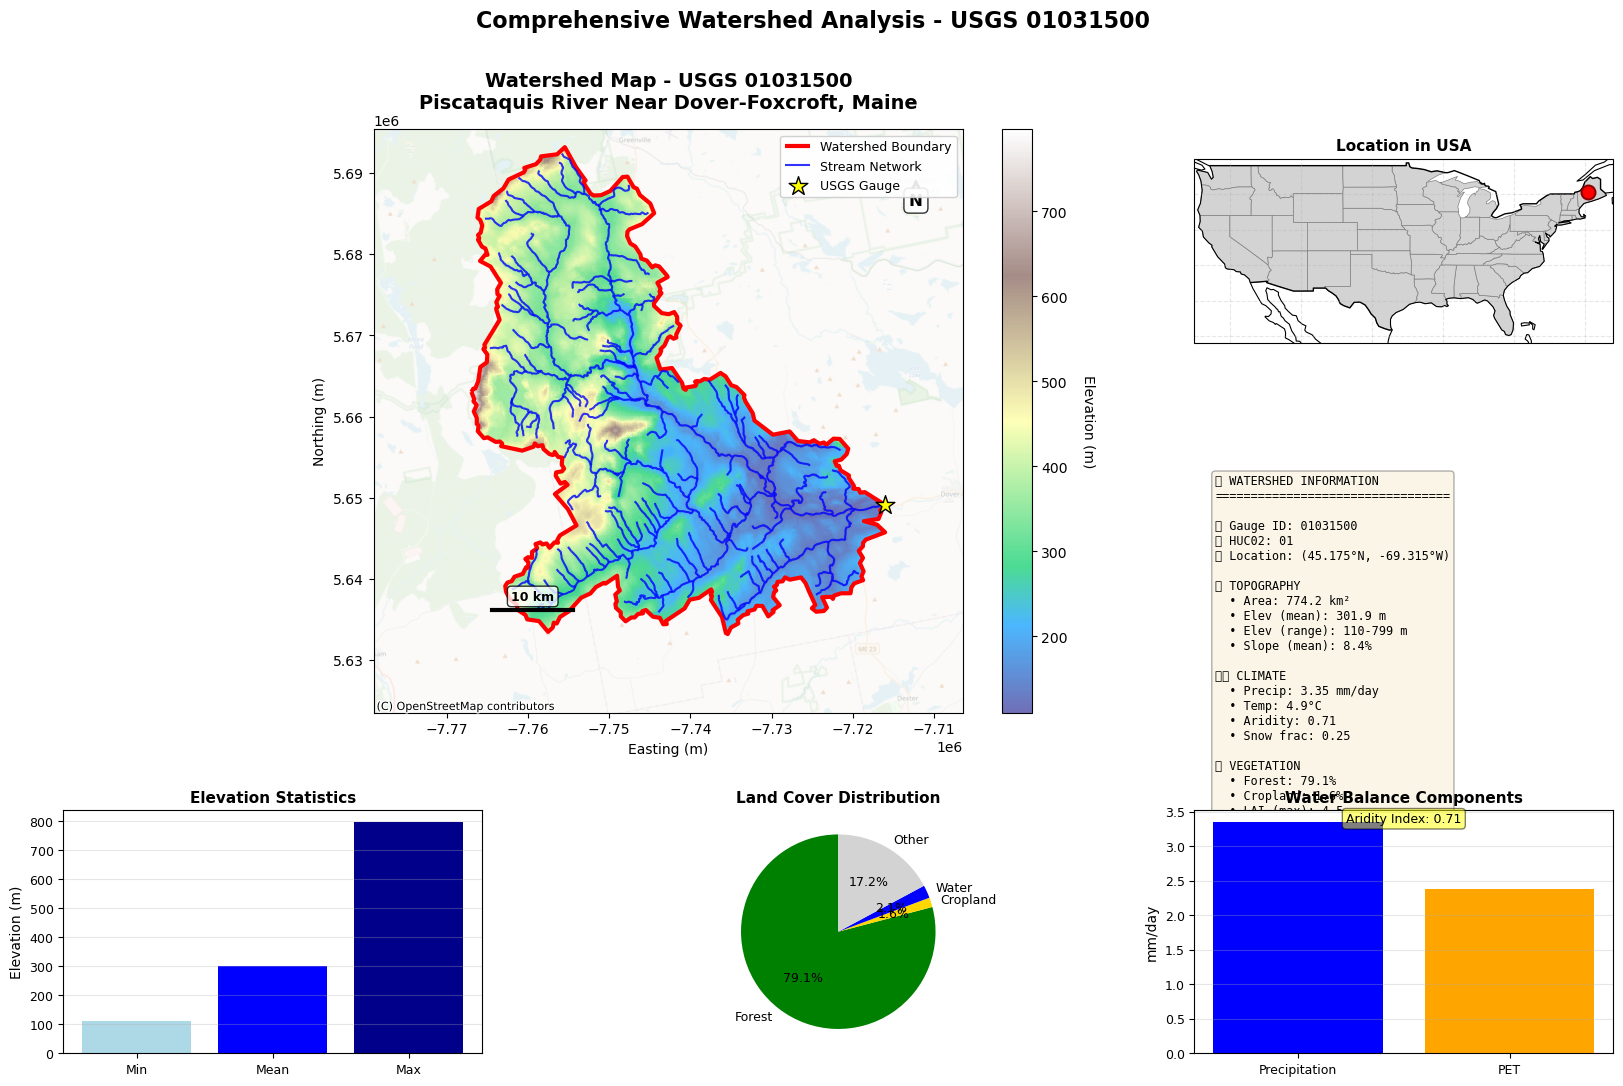

✓ Comprehensive map created!
  Includes: DEM, streams, boundaries, statistics, charts


In [6]:
# Create comprehensive multi-panel map
fig = extractor.create_comprehensive_map(
    save_path='comprehensive_watershed_map.png',
    show=True
)

print("✓ Comprehensive map created!")
print("  Includes: DEM, streams, boundaries, statistics, charts")

## 4. Batch Processing Multiple Gauges

Extract attributes for multiple gauges efficiently.

In [9]:
# Define gauge list
gauge_ids = [
    '01031500',  # Piscataquis River, ME
    '02177000',  # Edisto River, SC
    '06803530',  # Salt Creek, NE
]

# Extract attributes for all gauges
multi_df = extract_multiple_gauges(gauge_ids)

print(f"\n✓ Extracted attributes for {len(multi_df)} gauges")
multi_df[['gauge_id', 'gauge_name', 'area_geospa_fabric', 'aridity', 'frac_forest']]


[1/3] Processing gauge 01031500...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'day' ('day',) The recommendation is to set join explicitly for this case.
  clm = xr.merge(_open_dataset(f) for f in clm_all_files).astype("f4")
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  clm = xr.merge(_open_

  - Extracting soil attributes...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygeohydro/pygeohydro.py:674: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  return xr.merge([_read_layer(lyr, valid_depths[d]) for lyr, d in zip(lyr_names, lyr_depths)])
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


  ✓ Soil attributes extracted successfully
  - Extracting vegetation attributes...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


  - Fetching NLCD 2021 land cover...
    ✓ Forest fraction: 0.791, Dominant: Forest
  ✓ Vegetation attributes extracted successfully
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=01031500&startDT=1989-10-01&endDT=2009-09-30


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'day' ('day',) The recommendation is to set join explicitly for this case.
  clm = xr.merge(_open_dataset(f) for f in clm_all_files).astype("f4")
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  clm = xr.merge(_open_

  ✓ Success (73 attributes)

[2/3] Processing gauge 02177000...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'day' ('day',) The recommendation is to set join explicitly for this case.
  clm = xr.merge(_open_dataset(f) for f in clm_all_files).astype("f4")
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  clm = xr.merge(_open_

  - Extracting soil attributes...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygeohydro/pygeohydro.py:674: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  return xr.merge([_read_layer(lyr, valid_depths[d]) for lyr, d in zip(lyr_names, lyr_depths)])
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


  ✓ Soil attributes extracted successfully
  - Extracting vegetation attributes...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


  - Fetching NLCD 2021 land cover...
    ✓ Forest fraction: 0.915, Dominant: Forest
  ✓ Vegetation attributes extracted successfully
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=02177000&startDT=1989-10-01&endDT=2009-09-30


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'day' ('day',) The recommendation is to set join explicitly for this case.
  clm = xr.merge(_open_dataset(f) for f in clm_all_files).astype("f4")
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  clm = xr.merge(_open_

  ✓ Success (73 attributes)

[3/3] Processing gauge 06803530...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'day' ('day',) The recommendation is to set join explicitly for this case.
  clm = xr.merge(_open_dataset(f) for f in clm_all_files).astype("f4")
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  clm = xr.merge(_open_

  - Extracting soil attributes...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygeohydro/pygeohydro.py:674: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  return xr.merge([_read_layer(lyr, valid_depths[d]) for lyr, d in zip(lyr_names, lyr_depths)])
/Users/mgalib/Library/CloudStorage/Box-Box/Obsidian/Pycamels/CamelsAttrs/camels_attributes/soil.py:89: RuntimeWarning: invalid value encountered in log10
  soil_conductivity_log10 = np.log10(soil_conductivity_mmhr.mean(skipna=True).item())
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


  ✓ Soil attributes extracted successfully
  - Extracting vegetation attributes...


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


  - Fetching NLCD 2021 land cover...
    ✓ Forest fraction: 0.028, Dominant: Planted/Cultivated
  ✓ Vegetation attributes extracted successfully
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06803530&startDT=1989-10-01&endDT=2009-09-30
  ✓ Success (73 attributes)

✓ Extracted attributes for 3 gauges


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'day' ('day',) The recommendation is to set join explicitly for this case.
  clm = xr.merge(_open_dataset(f) for f in clm_all_files).astype("f4")
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/pygridmet/pygridmet.py:161: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  clm = xr.merge(_open_

,gauge_id,gauge_name,area_geospa_fabric,aridity,frac_forest
0,01031500,"Piscataquis River Near Dover-Foxcroft, Maine",774.153569,0.707444,0.790899
1,02177000,"Chattooga River Near Clayton, GA",526.856130,0.612894,0.914665
2,06803530,"Rock Creek Near Ceresco, Nebr",309.526777,1.569319,0.028450


## 5. Multi-Gauge Comparison Visualization

Create side-by-side US maps comparing attributes across multiple catchments.

In [10]:
# Method 1: Using extracted DataFrame
fig = plot_attributes_comparison(
    multi_df,
    attributes_to_plot=['aridity', 'frac_forest', 'q_mean'],
    n_classes=6,
    colormap='RdYlBu',
    reverse_colormap=True,
    include_histogram=True,
    figure_title='Regional Catchment Characteristics',
    save_path='multi_gauge_comparison.png'
)

print("✓ Multi-gauge comparison map created!")

/Users/mgalib/Library/CloudStorage/Box-Box/Obsidian/Pycamels/CamelsAttrs/camels_attributes/multi_gauge_viz.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', Dow

✓ Comparison map saved: multi_gauge_comparison.png
✓ Multi-gauge comparison map created!


/opt/miniconda3/envs/hydro/lib/python3.11/site-packages/shapely/creation.py:460: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)


In [ ]:
# Method 2: Extract and visualize in one step
regional_gauges = ['01031500', '02177000', '06803530', '08324000', '11266500']

df_regional, fig_regional = create_multi_gauge_comparison(
    regional_gauges,
    attributes_to_plot=['aridity', 'slope_mean', 'frac_forest'],
    figure_title='Transcontinental Watershed Comparison',
    save_path='transcontinental_comparison.png'
)

print("✓ Transcontinental comparison complete!")

## 6. Timeseries Data Extraction

Extract daily hydrometeorological forcing data.

### 6.1 Extract Forcing Data

In [11]:
# Extract timeseries for a specific period
forcing_data = extractor.extract_timeseries(
    start_date='2020-01-01',
    end_date='2020-12-31',
    include_hargreaves_pet=True
)

print(f"✓ Extracted {len(forcing_data)} days of forcing data")
print(f"\nVariables: {list(forcing_data.columns)}")
forcing_data.head()


Extracting timeseries data for gauge 01031500...
Period: 2020-01-01 to 2020-12-31
Fetching GridMET data from 2020-01-01 to 2020-12-31...
✓ Retrieved 365 days of climate data
✓ Retrieved 365 days of forcing data
✓ Extracted 365 days of forcing data

Variables: ['date', 'prcp_mm', 'tmin_C', 'tmax_C', 'srad_Wm2', 'wind_ms', 'sph_kgkg', 'pet_mm', 'tavg_C', 'pet_hargreaves_mm']


/Users/mgalib/Library/CloudStorage/Box-Box/Obsidian/Pycamels/CamelsAttrs/camels_attributes/extractor.py:343: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = self.watershed_gdf.to_crs('EPSG:4326').centroid.iloc[0]


,date,prcp_mm,tmin_C,tmax_C,srad_Wm2,wind_ms,sph_kgkg,pet_mm,tavg_C,pet_hargreaves_mm
0,2020-01-01,0.000000,-3.954071,0.309174,39.924488,5.244898,0.001886,1.169388,-1.822449,0.392602
1,2020-01-02,0.000000,-3.180603,3.323456,69.185715,4.183673,0.001868,1.267347,0.071426,0.939941
2,2020-01-03,0.000000,-2.096954,4.603088,65.432655,2.934694,0.002120,1.042857,1.253067,0.961902
3,2020-01-04,2.516327,-3.854065,3.170410,33.404083,2.302041,0.002148,0.861224,-0.341827,0.460721
4,2020-01-05,0.000000,-15.331635,-2.739807,34.204079,7.238775,0.001585,0.610204,-9.035721,0.317082


### 6.2 Calculate Monthly Aggregations

In [12]:
# Get monthly summary statistics
monthly_data = get_monthly_summary(forcing_data)

print("✓ Monthly aggregations calculated")
monthly_data.head()

✓ Monthly aggregations calculated


,year_month,prcp_mm,pet_mm,tavg_C,tmax_C,tmin_C,srad_Wm2
0,2020-01,47.967346,24.118366,-7.002332,-2.089295,-11.915370,72.825012
1,2020-02,75.385712,28.140816,-7.912836,-1.433807,-14.391865,104.140396
2,2020-03,63.761227,56.273472,-1.795286,3.691154,-7.281726,177.608093
3,2020-04,135.424500,85.467346,3.173032,8.621638,-2.275575,210.520966
4,2020-05,60.189796,129.724487,10.563077,17.433880,3.692275,245.679535


### 6.3 Water Balance Analysis

In [13]:
# Calculate annual water balance
water_balance = calculate_water_balance(forcing_data)

print("✓ Water balance calculated")
water_balance

✓ Water balance calculated


,prcp_mm,pet_mm,water_surplus_mm,aridity_index
year,,,,
2020,1126.236694,944.440796,181.795898,0.838581


### 6.4 Visualize Timeseries

In [14]:
# Plot precipitation and temperature
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Precipitation
axes[0].plot(forcing_data['date'], forcing_data['prcp_mm'], 'b-', linewidth=0.5)
axes[0].set_ylabel('Precipitation (mm/day)', fontsize=12)
axes[0].set_title(f'Hydrometeorological Forcing - {gauge_id}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Temperature
axes[1].plot(forcing_data['date'], forcing_data['tmin_C'], 'b-', label='Tmin', linewidth=0.8)
axes[1].plot(forcing_data['date'], forcing_data['tmax_C'], 'r-', label='Tmax', linewidth=0.8)
axes[1].plot(forcing_data['date'], forcing_data['tavg_C'], 'k-', label='Tavg', linewidth=1)
axes[1].set_ylabel('Temperature (°C)', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('forcing_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Timeseries visualization created!")

✓ Timeseries visualization created!


/var/folders/ns/7gh688vn04x1rtn_tsr23pmm0000gn/T/ipykernel_93846/159792080.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


## 7. Advanced Usage

### 7.1 Custom Date Ranges for Hydrological Signatures

In [ ]:
# Extract with custom hydrology period
custom_extractor = CamelsExtractor(
    '01031500',
    climate_start='2010-01-01',
    climate_end='2020-12-31',
    hydro_start='2010-01-01',
    hydro_end='2020-12-31'
)

custom_attrs = custom_extractor.extract_all(verbose=False)
print(f"✓ Extracted attributes with custom date range")
print(f"  Q_mean: {custom_attrs.get('q_mean', 'N/A'):.2f} mm/day")
print(f"  Baseflow index: {custom_attrs.get('baseflow_index', 'N/A'):.2f}")

### 7.2 Climate Statistics from Forcing Data

In [ ]:
# Calculate comprehensive climate statistics
climate_stats = extractor.get_forcing_statistics(forcing_data)

print("✓ Climate statistics calculated:")
for key, value in list(climate_stats.items())[:10]:
    print(f"  {key}: {value}")

### 7.3 Standalone Visualization Function

In [ ]:
# Use standalone function for custom workflows
fig_custom = create_comprehensive_watershed_map(
    watershed_gdf=extractor.watershed_gdf,
    watershed_geom=extractor.watershed_geom,
    metadata=extractor.metadata,
    attributes=extractor.attributes,
    gauge_id=gauge_id,
    save_path='custom_watershed_map.png'
)

print("✓ Custom map created using standalone function!")

## 8. Export Summary

### 8.1 Export Multi-Gauge DataFrame

In [ ]:
# Export batch results
multi_df.to_csv('batch_extraction_results.csv', index=False)
print("✓ Batch results exported to CSV")

# Export specific attributes only
key_attrs = ['gauge_id', 'gauge_name', 'area_geospa_fabric', 'aridity', 
             'frac_forest', 'q_mean', 'baseflow_index']
multi_df[key_attrs].to_csv('key_attributes_summary.csv', index=False)
print("✓ Key attributes summary exported")

### 8.2 Export Timeseries Data

In [ ]:
# Export forcing data
forcing_data.to_csv('forcing_data_2020.csv', index=False)
monthly_data.to_csv('monthly_aggregations_2020.csv', index=False)

print("✓ Timeseries data exported")
print(f"  Daily data: {len(forcing_data)} rows")
print(f"  Monthly data: {len(monthly_data)} rows")

## 9. Complete Workflow Example

A complete workflow from extraction to visualization and export.

In [ ]:
def complete_watershed_analysis(gauge_id, output_prefix='analysis'):
    """
    Complete watershed analysis workflow.
    
    Parameters
    ----------
    gauge_id : str
        USGS gauge identifier
    output_prefix : str
        Prefix for output files
    """
    print(f"\n{'='*60}")
    print(f"Complete Analysis for Gauge {gauge_id}")
    print(f"{'='*60}\n")
    
    # 1. Extract attributes
    print("[1/4] Extracting catchment attributes...")
    extractor = CamelsExtractor(gauge_id)
    attrs = extractor.extract_all(verbose=False)
    print(f"  ✓ Extracted {len(attrs)} attributes")
    
    # 2. Create comprehensive map
    print("\n[2/4] Creating comprehensive watershed map...")
    fig = extractor.create_comprehensive_map(
        save_path=f'{output_prefix}_comprehensive_map.png',
        show=False
    )
    print(f"  ✓ Map saved: {output_prefix}_comprehensive_map.png")
    
    # 3. Extract timeseries
    print("\n[3/4] Extracting forcing timeseries...")
    forcing = extractor.extract_timeseries('2020-01-01', '2020-12-31')
    print(f"  ✓ Extracted {len(forcing)} days of data")
    
    # 4. Export results
    print("\n[4/4] Exporting results...")
    extractor.save(f'{output_prefix}_attributes.csv')
    forcing.to_csv(f'{output_prefix}_forcing.csv', index=False)
    print(f"  ✓ Attributes: {output_prefix}_attributes.csv")
    print(f"  ✓ Forcing: {output_prefix}_forcing.csv")
    
    print(f"\n{'='*60}")
    print("✓ Analysis Complete!")
    print(f"{'='*60}\n")
    
    return extractor, forcing


# Run complete analysis
extractor_demo, forcing_demo = complete_watershed_analysis(
    gauge_id='01031500',
    output_prefix='demo_watershed'
)

## 10. Summary

### Package Capabilities:

✅ **Attribute Extraction**
- 70+ catchment attributes
- Single or batch processing
- Topography, climate, soil, vegetation, geology, hydrology

✅ **Visualization**
- Single watershed: 6-panel comprehensive maps
- Multi-gauge: Side-by-side comparison maps
- Publication-ready quality

✅ **Timeseries Data**
- Daily forcing data from GridMET
- PET calculations
- Monthly aggregations
- Water balance

✅ **Export Options**
- CSV, JSON formats
- High-resolution figures
- Complete workflow automation

### Output Files Created:
- `comprehensive_watershed_map.png` - Single watershed 6-panel map
- `multi_gauge_comparison.png` - Regional comparison
- `transcontinental_comparison.png` - Large-scale comparison
- `forcing_timeseries.png` - Climate forcing visualization
- `single_gauge_attributes.csv` - Attribute data
- `batch_extraction_results.csv` - Multi-gauge data
- `forcing_data_2020.csv` - Daily forcing data
- `monthly_aggregations_2020.csv` - Monthly statistics

## 📚 Additional Resources

- **Documentation**: See README.md
- **GitHub**: https://github.com/galib9690/camels-attrs
- **Issues**: Report bugs via GitHub issues
- **Citation**: See README for citation information

---

**Author:** Mohammad Galib (mgalib@purdue.edu)  
**Institution:** Purdue University  
**Package Version:** 0.1.0